(array([20273.69097222, 20273.69103009, 20273.69108796, 20273.69114583]),
 [Text(20273.690972222223, 0, '16:35:00'),
  Text(20273.691030092592, 0, '16:35:05'),
  Text(20273.69108796296, 0, '16:35:10'),
  Text(20273.691145833334, 0, '16:35:15')])

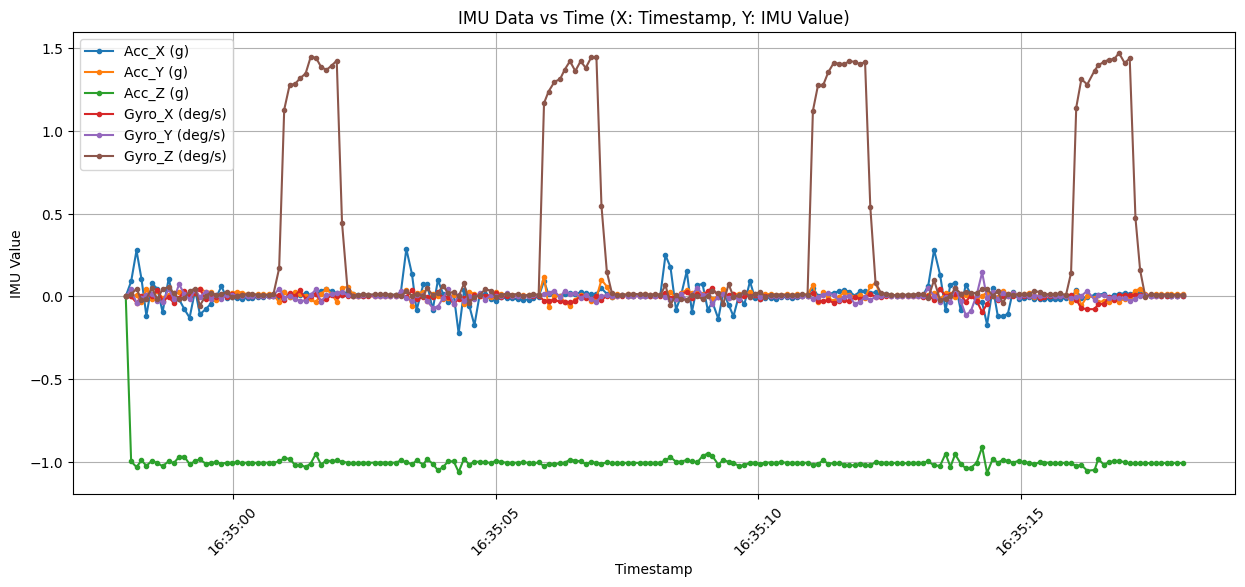

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_2_imu.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# เตรียมชื่อคอลัมน์ที่ต้องการพล็อต
imu_cols = [
    'Acc_X (g)', 'Acc_Y (g)', 'Acc_Z (g)',
    'Gyro_X (deg/s)', 'Gyro_Y (deg/s)', 'Gyro_Z (deg/s)'
]

# Plot ข้อมูล IMU ทุกคอลัมน์ในกราฟเดียวกัน
plt.figure(figsize=(15, 6))
for col in imu_cols:
    plt.plot(df['Timestamp'], df[col], marker='.', linestyle='-', label=col)

plt.xlabel('Timestamp')
plt.ylabel('IMU Value')
plt.title('IMU Data vs Time (X: Timestamp, Y: IMU Value)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

(array([20273.69097222, 20273.69103009, 20273.69108796, 20273.69114583]),
 [Text(20273.690972222223, 0, '16:35:00'),
  Text(20273.691030092592, 0, '16:35:05'),
  Text(20273.69108796296, 0, '16:35:10'),
  Text(20273.691145833334, 0, '16:35:15')])

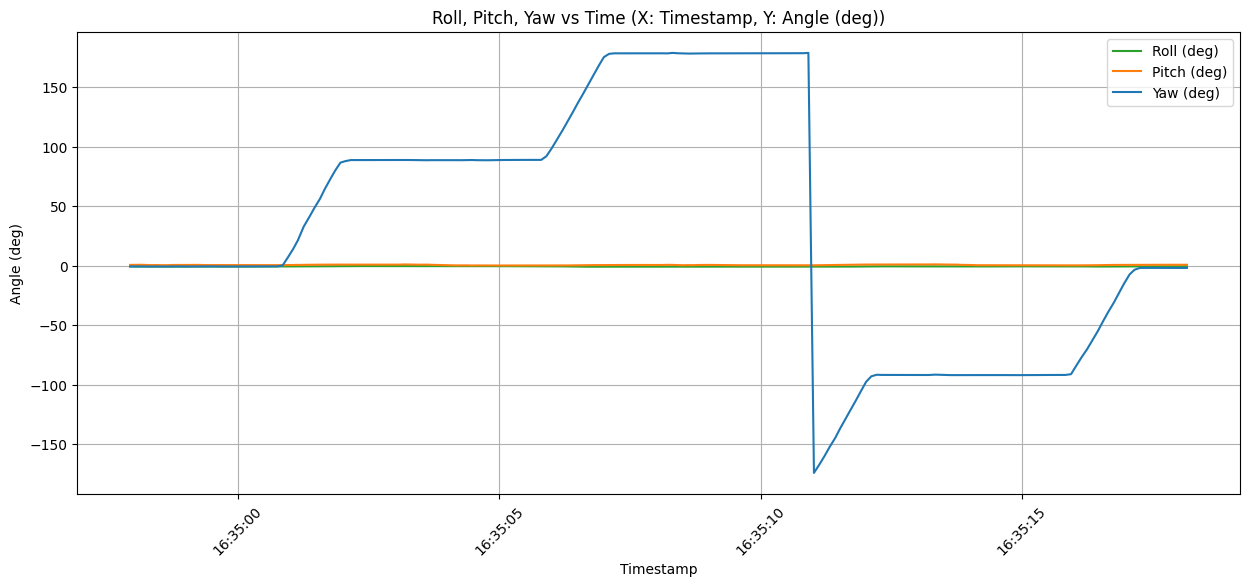

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_2_attitude.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot Roll, Pitch, Yaw ในกราฟเดียวกัน
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Yaw (deg)'], label='Roll (deg)', color='tab:green')
plt.plot(df['Timestamp'], df['Pitch (deg)'], label='Pitch (deg)', color='tab:orange')
plt.plot(df['Timestamp'], df['Roll (deg)'], label='Yaw (deg)', color='tab:blue')

plt.xlabel('Timestamp')
plt.ylabel('Angle (deg)')
plt.title('Roll, Pitch, Yaw vs Time (X: Timestamp, Y: Angle (deg))')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

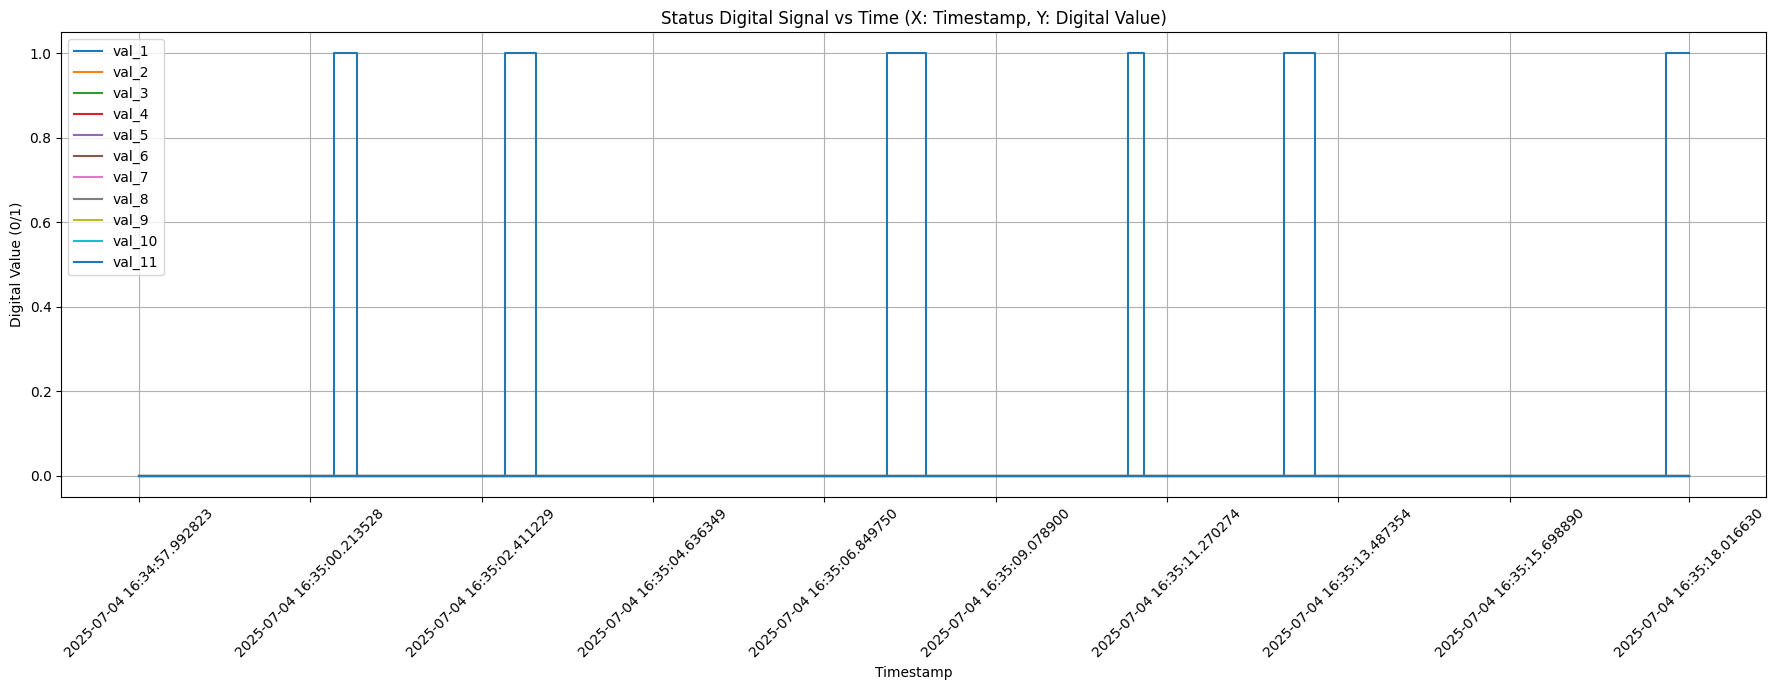

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_2_status.csv")

# แปลงคอลัมน์ data จาก string เป็น list
df['data'] = df['data'].apply(ast.literal_eval)

# แยกข้อมูลแต่ละค่าใน data ออกมาเป็นคอลัมน์ใหม่
data_cols = [f'val_{i+1}' for i in range(len(df['data'][0]))]
data_expanded = pd.DataFrame(df['data'].tolist(), columns=data_cols)

# รวมกับ Timestamp
df_plot = pd.concat([df['Timestamp'], data_expanded], axis=1)

plt.figure(figsize=(18, 7))
for col in data_cols:
    plt.step(df_plot['Timestamp'], df_plot[col], where='post', label=col)

plt.xlabel('Timestamp')
plt.ylabel('Digital Value (0/1)')
plt.title('Status Digital Signal vs Time (X: Timestamp, Y: Digital Value)')
plt.legend()
plt.grid(True)

# โชว์ label timestamp แค่ 10 อัน (กระจายเท่าๆ กัน)
num_ticks = 10
tick_indices = np.linspace(0, len(df_plot['Timestamp']) - 1, num_ticks, dtype=int)
plt.xticks(df_plot['Timestamp'].iloc[tick_indices], rotation=45)

plt.tight_layout()
plt.show()

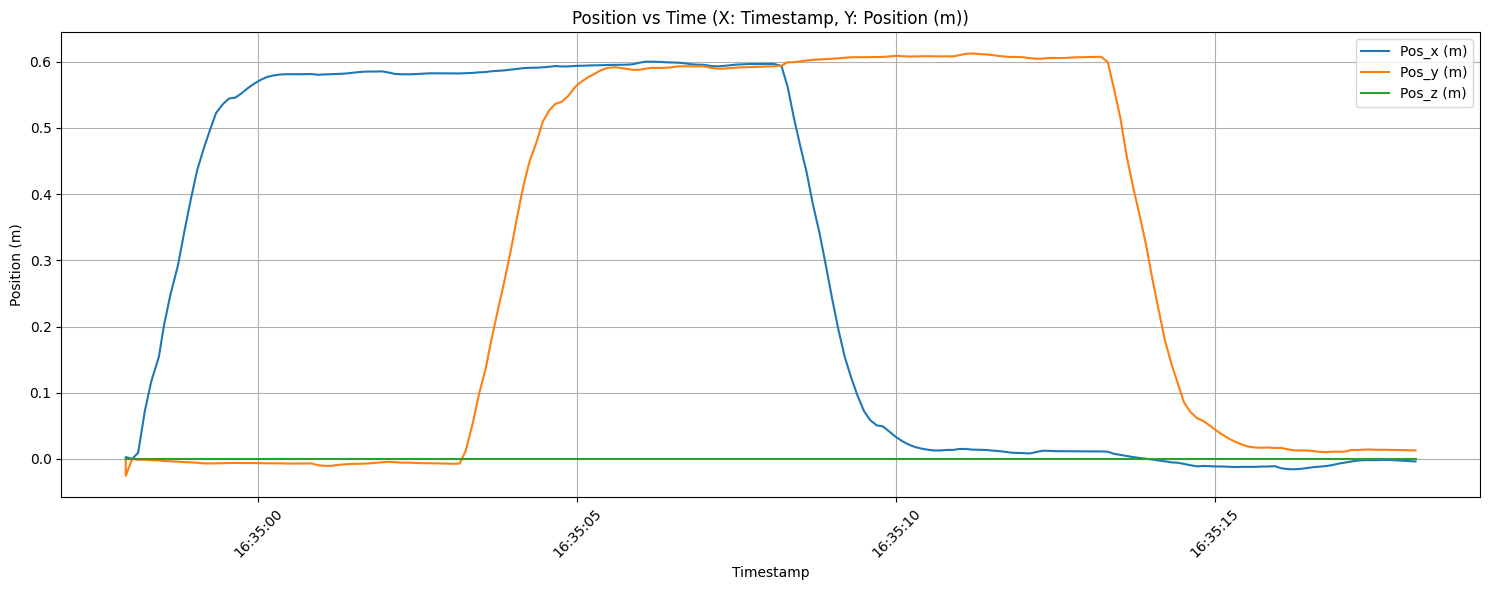

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_2_position.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot Pos_x, Pos_y, Pos_z ในกราฟเดียวกัน
plt.figure(figsize=(15, 6))
plt.plot(df['Timestamp'], df['Pos_x (m)'], label='Pos_x (m)', color='tab:blue')
plt.plot(df['Timestamp'], df['Pos_y (m)'], label='Pos_y (m)', color='tab:orange')
plt.plot(df['Timestamp'], df['Pos_z (m)'], label='Pos_z (m)', color='tab:green')

plt.xlabel('Timestamp')
plt.ylabel('Position (m)')
plt.title('Position vs Time (X: Timestamp, Y: Position (m))')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(array([20273.69097222, 20273.69103009, 20273.69108796, 20273.69114583]),
 [Text(20273.690972222223, 0, '16:35:00'),
  Text(20273.691030092592, 0, '16:35:05'),
  Text(20273.69108796296, 0, '16:35:10'),
  Text(20273.691145833334, 0, '16:35:15')])

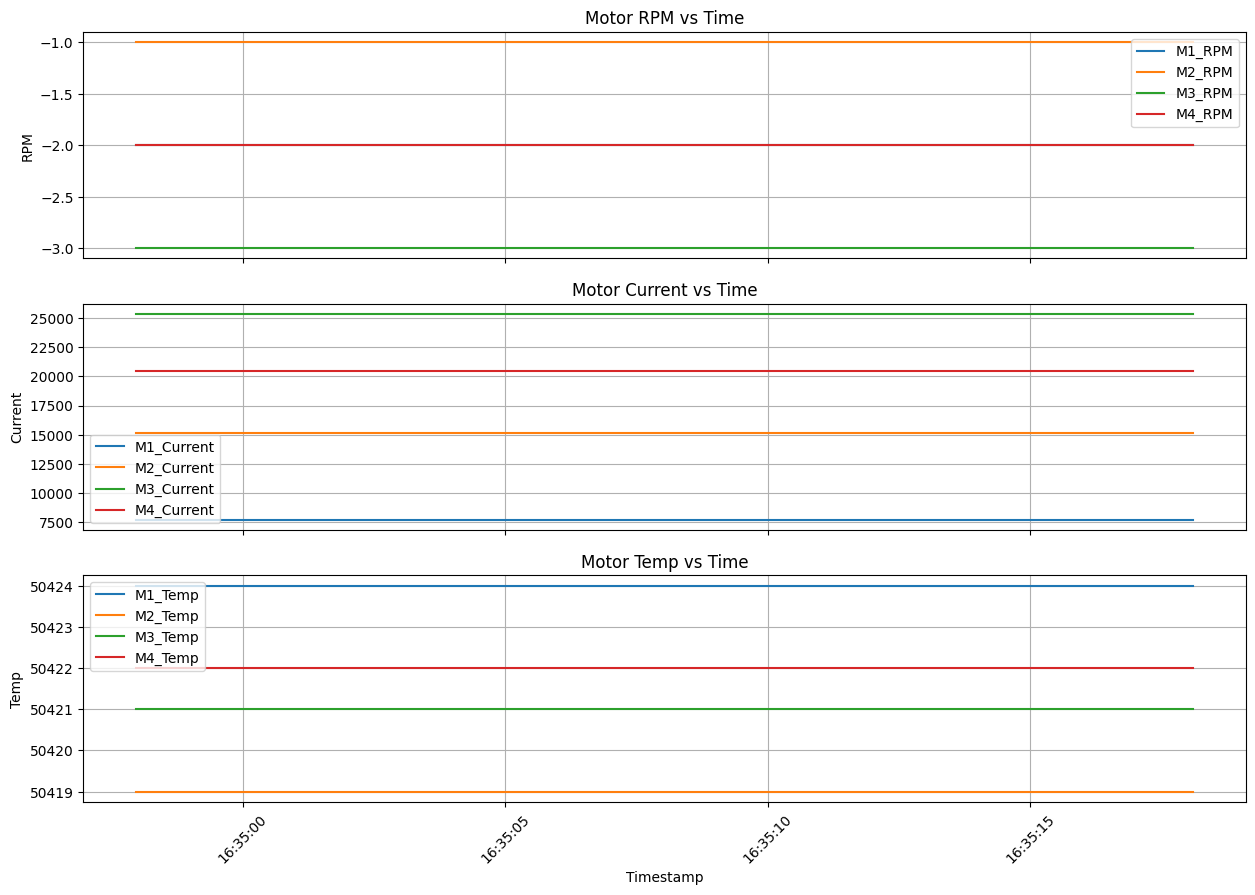

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import ast

# อ่านไฟล์ CSV
df = pd.read_csv("move_square_robot_log_2_esc.csv")

# แปลงคอลัมน์เวลาเป็น datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# ฟังก์ชันแปลง string list เป็น list ของตัวเลข
def parse_list_column(col):
    return df[col].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else [None]*4)

# แปลงแต่ละคอลัมน์ ESC เป็น DataFrame ย่อย
rpm = pd.DataFrame(parse_list_column('M1_RPM').to_list(), columns=['M1_RPM', 'M2_RPM', 'M3_RPM', 'M4_RPM'])
current = pd.DataFrame(parse_list_column('M1_Current').to_list(), columns=['M1_Current', 'M2_Current', 'M3_Current', 'M4_Current'])
temp = pd.DataFrame(parse_list_column('M1_Temp').to_list(), columns=['M1_Temp', 'M2_Temp', 'M3_Temp', 'M4_Temp'])

# รวม Timestamp
rpm['Timestamp'] = df['Timestamp']
current['Timestamp'] = df['Timestamp']
temp['Timestamp'] = df['Timestamp']

# พล็อตค่า RPM ของมอเตอร์แต่ละตัว
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

for i, label in enumerate(['M1', 'M2', 'M3', 'M4']):
    axes[0].plot(rpm['Timestamp'], rpm[f'{label}_RPM'], label=f'{label}_RPM')
axes[0].set_ylabel('RPM')
axes[0].set_title('Motor RPM vs Time')
axes[0].legend()
axes[0].grid(True)

for i, label in enumerate(['M1', 'M2', 'M3', 'M4']):
    axes[1].plot(current['Timestamp'], current[f'{label}_Current'], label=f'{label}_Current')
axes[1].set_ylabel('Current')
axes[1].set_title('Motor Current vs Time')
axes[1].legend()
axes[1].grid(True)

for i, label in enumerate(['M1', 'M2', 'M3', 'M4']):
    axes[2].plot(temp['Timestamp'], temp[f'{label}_Temp'], label=f'{label}_Temp')
axes[2].set_ylabel('Temp')
axes[2].set_title('Motor Temp vs Time')
axes[2].set_xlabel('Timestamp')
axes[2].legend()
axes[2].grid(True)

plt.xticks(rotation=45)